In [1]:
import math
import numpy as np
import struct
import matplotlib.pyplot as plt
from matplotlib import patches
import rich.progress
from PIL import Image
import json
import os

In [2]:
# Open the file.
# Matrix dimension 90*90*32*6*8
with open('../SysMatConfig/Parameters.json') as json_file:
    parameters = json.load(json_file)

NImgX_ = parameters["numImageX"]
NImgY_ = parameters["numImageY"]
NDetY_ = parameters["pixelSiPM"]
NModule_ = parameters["numPanel"]
NDetX_ = parameters["numDetectorLayer"]


sysMatPath= parameters["sysmatPath"]

dataSize = NImgX_*NImgY_*NDetY_*NModule_*NDetX_
sysMats=np.zeros((4,NDetX_,NModule_,NDetY_, NImgX_,NImgY_))
n_Rotations = parameters['numRotation']
rawData = []
# Read in the matrix
idx=0


for idx_rotation in range(n_Rotations):
    fname = 'sysmatMatrix_Rot_{0}_of_{1}.sysmat'.format(idx_rotation,n_Rotations)
# print("Reading in the Matrix")
    inF = open(
        '{:s}{:s}'.format(sysMatPath,fname), 'rb')
    dataUnpack = np.asarray(struct.unpack('f'*dataSize, inF.read(dataSize*4)))
# # Reshape the 5D array into a 2D matrix
    sysMats[idx,:,:,:,:,:] = dataUnpack.reshape((NDetX_,NModule_,NDetY_,NImgX_,NImgY_))
    idx += 1
    inF.close()
# print("Complete Read-in Data!")
# imgTemplate = np.zeros((NImgX_, NImgY_))
# print("{:>28}:\t{:}".format("Read-in System Matrix Shape", dataMatrix.shape))


No of slits: 21


/user/aajith2/.local/lib/python3.6/site-packages/matplotlib/image.py:446: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
/user/aajith2/.local/lib/python3.6/site-packages/matplotlib/image.py:453: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/user/aajith2/.local/lib/python3.6/site-packages/matplotlib/image.py:458: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)


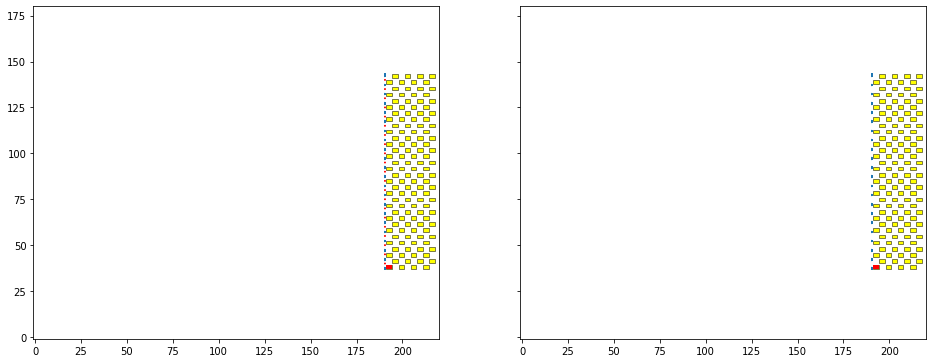

In [5]:
fig,ax=plt.subplots(1,2,sharey=True,figsize=(16,9))
xId=0
yId=0
pId=0
cmap=plt.cm.turbo
data0 = np.where(sysMats[0,xId,pId,yId,:,:]== 0,
                 np.nan, sysMats[0,xId,pId,yId,:,:])
data1 = np.where(sysMats[1,xId,pId,yId,:,:]== 0,
                 np.nan, sysMats[1,xId,pId,yId,:,:])
ax[0].imshow(data0,cmap=cmap)
ax[1].imshow(data1,cmap=cmap)
# nEvnts_old = int(hXtal_old.GetEntries())
aperture_width = 3.0
aperture_pitch = 5.0
plate_thick = 1.0
N_slits = math.floor((107.52-aperture_width)/aperture_pitch)+1
print(f"No of slits: {N_slits}")

apt_y_0 = (107.520-int(N_slits-1)*aperture_pitch)*0.5
aperture_y = np.arange(apt_y_0, 107.52, aperture_pitch)
detector_y = np.arange(1.68, 107.52, 3.36)
aperture_x = np.ones(aperture_y.size)*plate_thick*0.5
detector_x = np.linspace(np.zeros(detector_y.size), np.ones(
    detector_y.size)*7, 8, axis=0)*3.36+(1.68+plate_thick)
detector_x = detector_x + 190
aperture_x = aperture_x + 190
aperture_y = aperture_y + 36.24
detector_y = detector_y + 36.24
ax[0].add_patch(patches.Rectangle(
    (190, (180-107.52)*0.5), plate_thick, 107.52))
for ele in np.column_stack((aperture_x, aperture_y)):
    x = ele[0]-plate_thick*0.5
    y = ele[1]-aperture_width*0.5
    ax[0].add_patch(patches.Rectangle(
        (x, y), plate_thick, aperture_width, color='white'))
    ax[0].add_patch(patches.Circle((ele[0], ele[1]), radius=0.25, color='red'))
detIdx = 0
for xlayerIdx in range(0, 8):
    for ele in np.column_stack((detector_x[xlayerIdx], detector_y)):
        x = ele[0]-3.0*0.5
        y = ele[1]-2.0*0.5
        if (detIdx % 2) == 0:
            ax[0].add_patch(patches.Rectangle(
                (x, y), 3.0, 2.0, facecolor='yellow', linewidth=0.5, edgecolor='black'))
        detIdx = detIdx + 1
    detIdx = detIdx + 1
ax[0].set_ylim(-1, 180)
ax[0].set_xlim(-1, 220)
ax[0].add_patch(patches.Rectangle((detector_x[xId, yId]-3.0*0.5,
                detector_y[yId]-2.0*0.5), 3.0, 2.0, facecolor='red'))

ax[1].add_patch(patches.Rectangle(
    (190, (180-107.52)*0.5), plate_thick, 107.52))
for ele in np.column_stack((aperture_x, aperture_y)):
    x = ele[0]-plate_thick*0.5
    y = ele[1]-aperture_width*0.5
    ax[1].add_patch(patches.Rectangle(
        (x, y), plate_thick, aperture_width, color='white'))
    # ax.add_patch(patches.Circle((ele[0],ele[1]), radius=0.25, color='red'))
detIdx = 0
for xlayerIdx in range(0, 8):
    for ele in np.column_stack((detector_x[xlayerIdx], detector_y)):
        x = ele[0]-3.0*0.5
        y = ele[1]-2.0*0.5
        if (detIdx % 2) == 0:
            ax[1].add_patch(patches.Rectangle(
                (x, y), 3.0, 2.0, facecolor='yellow', linewidth=0.5, edgecolor='black'))
        detIdx = detIdx + 1
    detIdx = detIdx + 1

ax[1].set_ylim(-1, 180)
ax[1].set_xlim(-1, 220)
ax[1].add_patch(patches.Rectangle((detector_x[xId, yId]-3.0*0.5,
                detector_y[yId]-2.0*0.5), 3.0, 2.0, facecolor='red'))


In [3]:
sysMatExpand=sysMats.reshape((4*NDetX_*NModule_*NDetY_, NImgX_*NImgY_))
import rich.progress
import scipy.io


from rich.progress import (
    BarColumn,
    DownloadColumn,
    Progress,
    TaskID,
    TextColumn,
    TimeRemainingColumn,
    TaskProgressColumn,
)

In [4]:
# Read in the phantom
# fname2 = 'phantom.mat'
# phantom_mat = scipy.io.loadmat(
#     '/home/fanghan/Work/SPEBT/local-archive/analysis/05072023/{:s}'.format(fname2))
# phantom = np.array(phantom_mat['phantom']).flatten()

fname2 = 'input/circle-phantom.npz'
# phantom_mat = scipy.io.loadmat(
#     '/home/fanghan/Work/SPEBT/local-archive/analysis/05072023/{:s}'.format(fname2))
# phantom = np.array(phantom_mat['phantom']).flatten()
dataUnpack = np.load(fname2)
dataSize = NImgX_*NImgY_
phantom = dataUnpack['arr_0'].reshape((NImgX_, NImgY_)).flatten()

In [5]:
# Remove zero rows from the matrix
sysMatrix = sysMatExpand[~np.all(sysMatExpand == 0, axis=1)]

# Calculate forward projection
matSum = np.sum(sysMatrix, axis=0, dtype='float64')
validIdx = np.array(np.where(matSum != 0))
reducedMat = np.reshape(sysMatrix[:, validIdx], (864*4, validIdx.shape[1]))
print("{:>28}:\t{:}".format("Reduced System Matrix Shape", reducedMat.shape))
reducedPhantom = phantom[np.where(matSum != 0)]
projection = np.matmul(reducedMat, reducedPhantom)
# proj_noise = np.random.poisson(projection)
# noisy_proj = np.random.poisson(projection)
noisy_proj = projection
print("{:>28}:\t{:}".format("Projection Shape", projection.shape))
validImgSize = reducedMat.shape[1]

 Reduced System Matrix Shape:	(3456, 25448)
            Projection Shape:	(3456,)


In [8]:
import rich.progress
import scipy.io


from rich.progress import (
    BarColumn,
    DownloadColumn,
    Progress,
    TaskID,
    TextColumn,
    TimeRemainingColumn,
    TaskProgressColumn,
)

In [10]:
def backwardProj(lastArr, projArr, sysMat):
    forwardLast = np.matmul(sysMat, lastArr)
    quotients = projArr/forwardLast
    return np.matmul(quotients, sysMat)/np.sum(sysMat, axis=0)*lastArr

# Calculate region map

import scipy.special
# bgIndex = np.nonzero(phantom.flatten() == bg)
# objIndex = []
# for idx in range(0, 6):
#     objIndex.append(np.nonzero(regionMapFlat == values[idx]))

# Iterate for many times, start from a flat image with all ones.
NIteration = 6000
reconImg = np.ones(validImgSize)
print('Number of Iterations: {:d}'.format(NIteration))
# print('Numerator: ',(np.mean(reconImg[objIndex[0]])-np.mean(reconImg[bgIndex])))
# print('Denominator: ',np.std(reconImg[bgIndex]))

progress = Progress(
    TextColumn("[progress.description]{task.description}"),
    BarColumn(),
    # TaskProgressColumn(),
    "{task.completed}/{task.total}",
    TimeRemainingColumn(),
)
scale = 100

epsilon = 1e-10
log_likelihoods = []

# Function to calculate the log of the factorial for each element in an array
def log_factorial_array(arr):
    result = np.zeros_like(arr, dtype=float)
    for i, n in enumerate(arr):
        result[i] = np.sum(np.log(np.arange(1, n + 1)))
    return result

# CNR = np.zeros((6, NIteration//scale))
storedReconImg = np.zeros((NIteration//scale, validImgSize))
with progress:
    progress.console.print("Iterative reconstruction calculation...")
    task1 = progress.add_task("Iteration:", total=NIteration)

    for iter in range(NIteration):
        reconImg = backwardProj(reconImg, noisy_proj, reducedMat)
        if iter % scale == 0:
            storedReconImg[iter//scale] = reconImg
        
        # Calculate the log likelihood
        estimated_measurements = np.matmul(reducedMat, reconImg)
        # print(estimated_measurements)
        # if (iter % 200 == 0):
        log_likelihood = np.sum(noisy_proj * np.log(estimated_measurements + epsilon) - estimated_measurements - scipy.special.gammaln(projection + 1))
        # print(log_likelihood)
        log_likelihoods.append(log_likelihood)


    # for iter in range(NIteration):
    #     reconImg = backwardProj(reconImg, noisy_proj, reducedMat)
    #     # reconImg = backwardProj(reconImg, projection, reducedMat)
    #     estimated_measurements = np.matmul(sysMatrix, reconImg)
    #     # print(estimated_measurements)
    #     log_likelihood = np.sum(noisy_proj * np.log(estimated_measurements + epsilon) - estimated_measurements)
    #     log_likelihoods.append(log_likelihood)
    #     progress.advance(task1)
    #     if iter % scale == 0:
    #         storedReconImg[iter//scale] = reconImg
    #         # for idx in range(0, 6):
    #         #     numerator=np.mean(reconImg[objIndex[0]])-np.mean(reconImg[bgIndex])
    #         #     denominator=np.std(reconImg[bgIndex])
    #         #     CNR[idx, iter//scale]=numerator/denominator


outFname = 'contrast-recon-data-rot30.npz'
np.savez(outFname, storedReconImg.astype(np.float32))

/user/aajith2/.local/lib/python3.6/site-packages/rich/live.py:229: UserWarning: install "ipywidgets" for Jupyter 
support
  warnings.warn('install "ipywidgets" for Jupyter support')

Iterative reconstruction calculation...

Number of Iterations: 6000


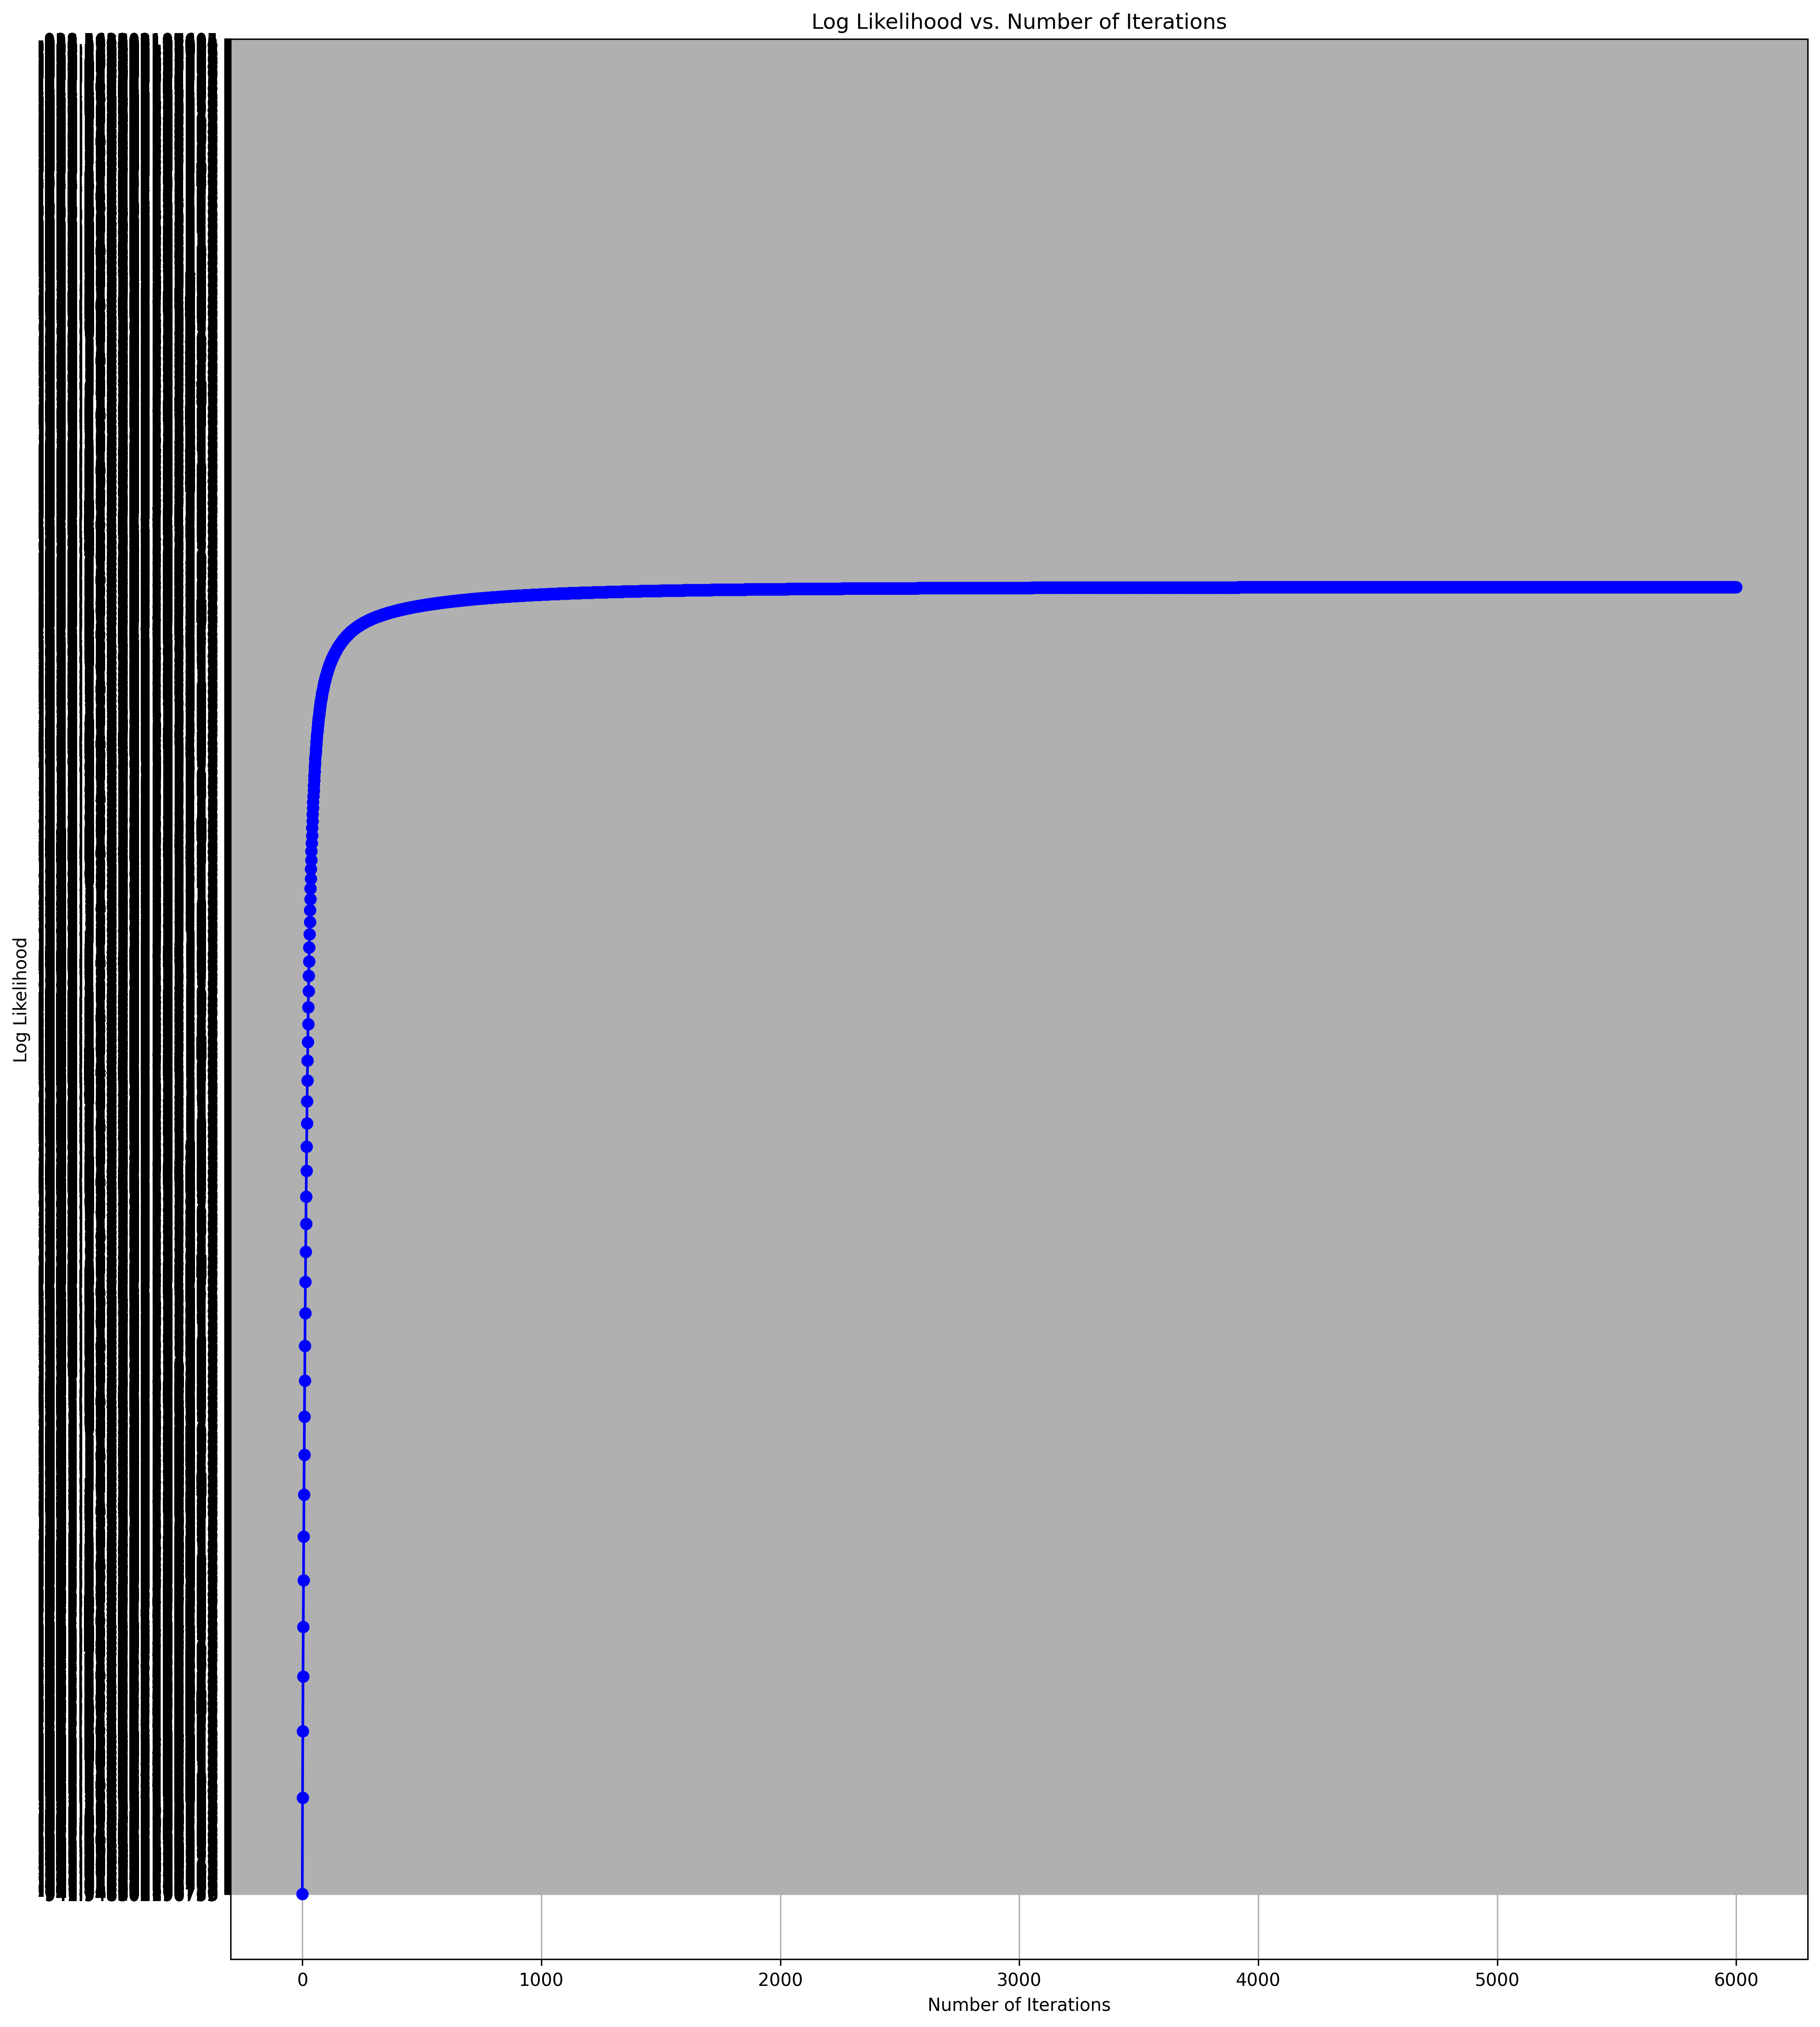

In [14]:
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, StrMethodFormatter

plt.figure(figsize=(16, 20), dpi=300)
plt.plot(range(len(log_likelihoods)), log_likelihoods, marker='o', linestyle='-', color='b')
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useOffset=False, useMathText=True))
plt.gca().yaxis.set_major_formatter(plt.FormatStrFormatter('%.12f'))
plt.yticks(np.arange(min(log_likelihoods), max(log_likelihoods)+1, 0.0001))

# plt.gca().yaxis.set_major_formatter(StrMethodFormatter("{x:.6f}"))
# plt.gca().ticklabel_format(useOffset=False, style='plain', useMathText=True)

plt.xlabel('Number of Iterations')
plt.ylabel('Log Likelihood')
plt.title('Log Likelihood vs. Number of Iterations')
plt.grid(True)
plt.show()

(60, 25448)


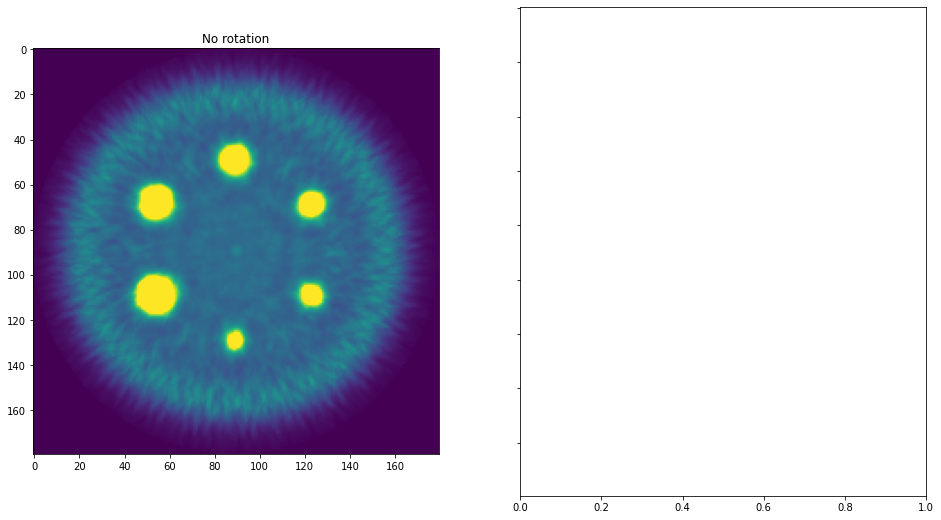

In [12]:
recon_0=np.load("contrast-recon-data-rot30.npz")['arr_0']
# recon_1=data1
print(recon_0.shape)

fig,ax=plt.subplots(1,2,sharey=True,figsize=(16,9))
data0=np.zeros(180*180)
# data1=np.zeros(180*180)
data0[validIdx]=recon_0[1]
# data1[validIdx]=recon_1[1]
im0=ax[0].imshow(data0.reshape((180,180)))
# im1=ax[1].imshow(data1.reshape((180,180)))
ax[0].set_title("No rotation")
# ax[1].set_title("No rotation + 30 degree rotation")
plt.ioff()
for frame in [1,2,3,4,5,6,7,8,9,10,20,30,40,50,59]:
    data0=np.zeros(180*180)
    data1=np.zeros(180*180)
    data0[validIdx]=recon_0[frame]
    # data1[validIdx]=recon_1[frame]
    im0.set_data(data0.reshape((180,180)))
    # im1.set_data(data1.reshape((180,180)))
    fig.savefig("iter_{:d}".format(frame*100))